# How to distinguish data from data distribution

Machine leanring technology has powerful ability of data classification, regression prediction and so on. Althought tremendous amount of data including article, image, voice signal can be collected from internet, different source data with same topic may show dissimilar data distribution. It will cause wrong prediction result if applying the trained model to different source data with same topic. Because, in common cases, the trained model only make precise predictions on the same data distribution, testing on other data will let computer confuse with how to make decision. 

Fortunately, many out of the box visualization tool can simply distinguish data from data distribution. I will show you how to use heat map to distinguish data. This method is not very formal and precise, but it's very simple to investigate data on hand.

In the following intruction, you have to install sklearn, numpy, matplotlib python packages to run the program. If you are not familiar with python, don't worry. The concept is very simple. 

First, I will use iris data to illustrate and demo.

In [1]:
from sklearn.datasets import load_iris
import numpy as np
#loading iris data
datas = load_iris(True)
#shuffle datat
data = datas[0]
true = datas[1]
arr = np.arange(len(data))
np.random.shuffle(arr)
data = data[arr]
true = true[arr]

print(data.shape)
print(np.unique(true))

(150, 4)
[0 1 2]


loading iris data from sklearn and shuffle the data. 
Iris data has 150 instances with 4 continuous features and 3 target classes

In [2]:
#divide data into two parts
#part1
data_1 = data[:100]
true_1 = true[:100]
#part2
data_2 = data[100:]
true_2 = true[100:]

We divide the data into two parts, part1 and part2. One as standard data and the other as comparison data

By reading the code and comment, you will understand how heat maps are generated on different distribution dataset.

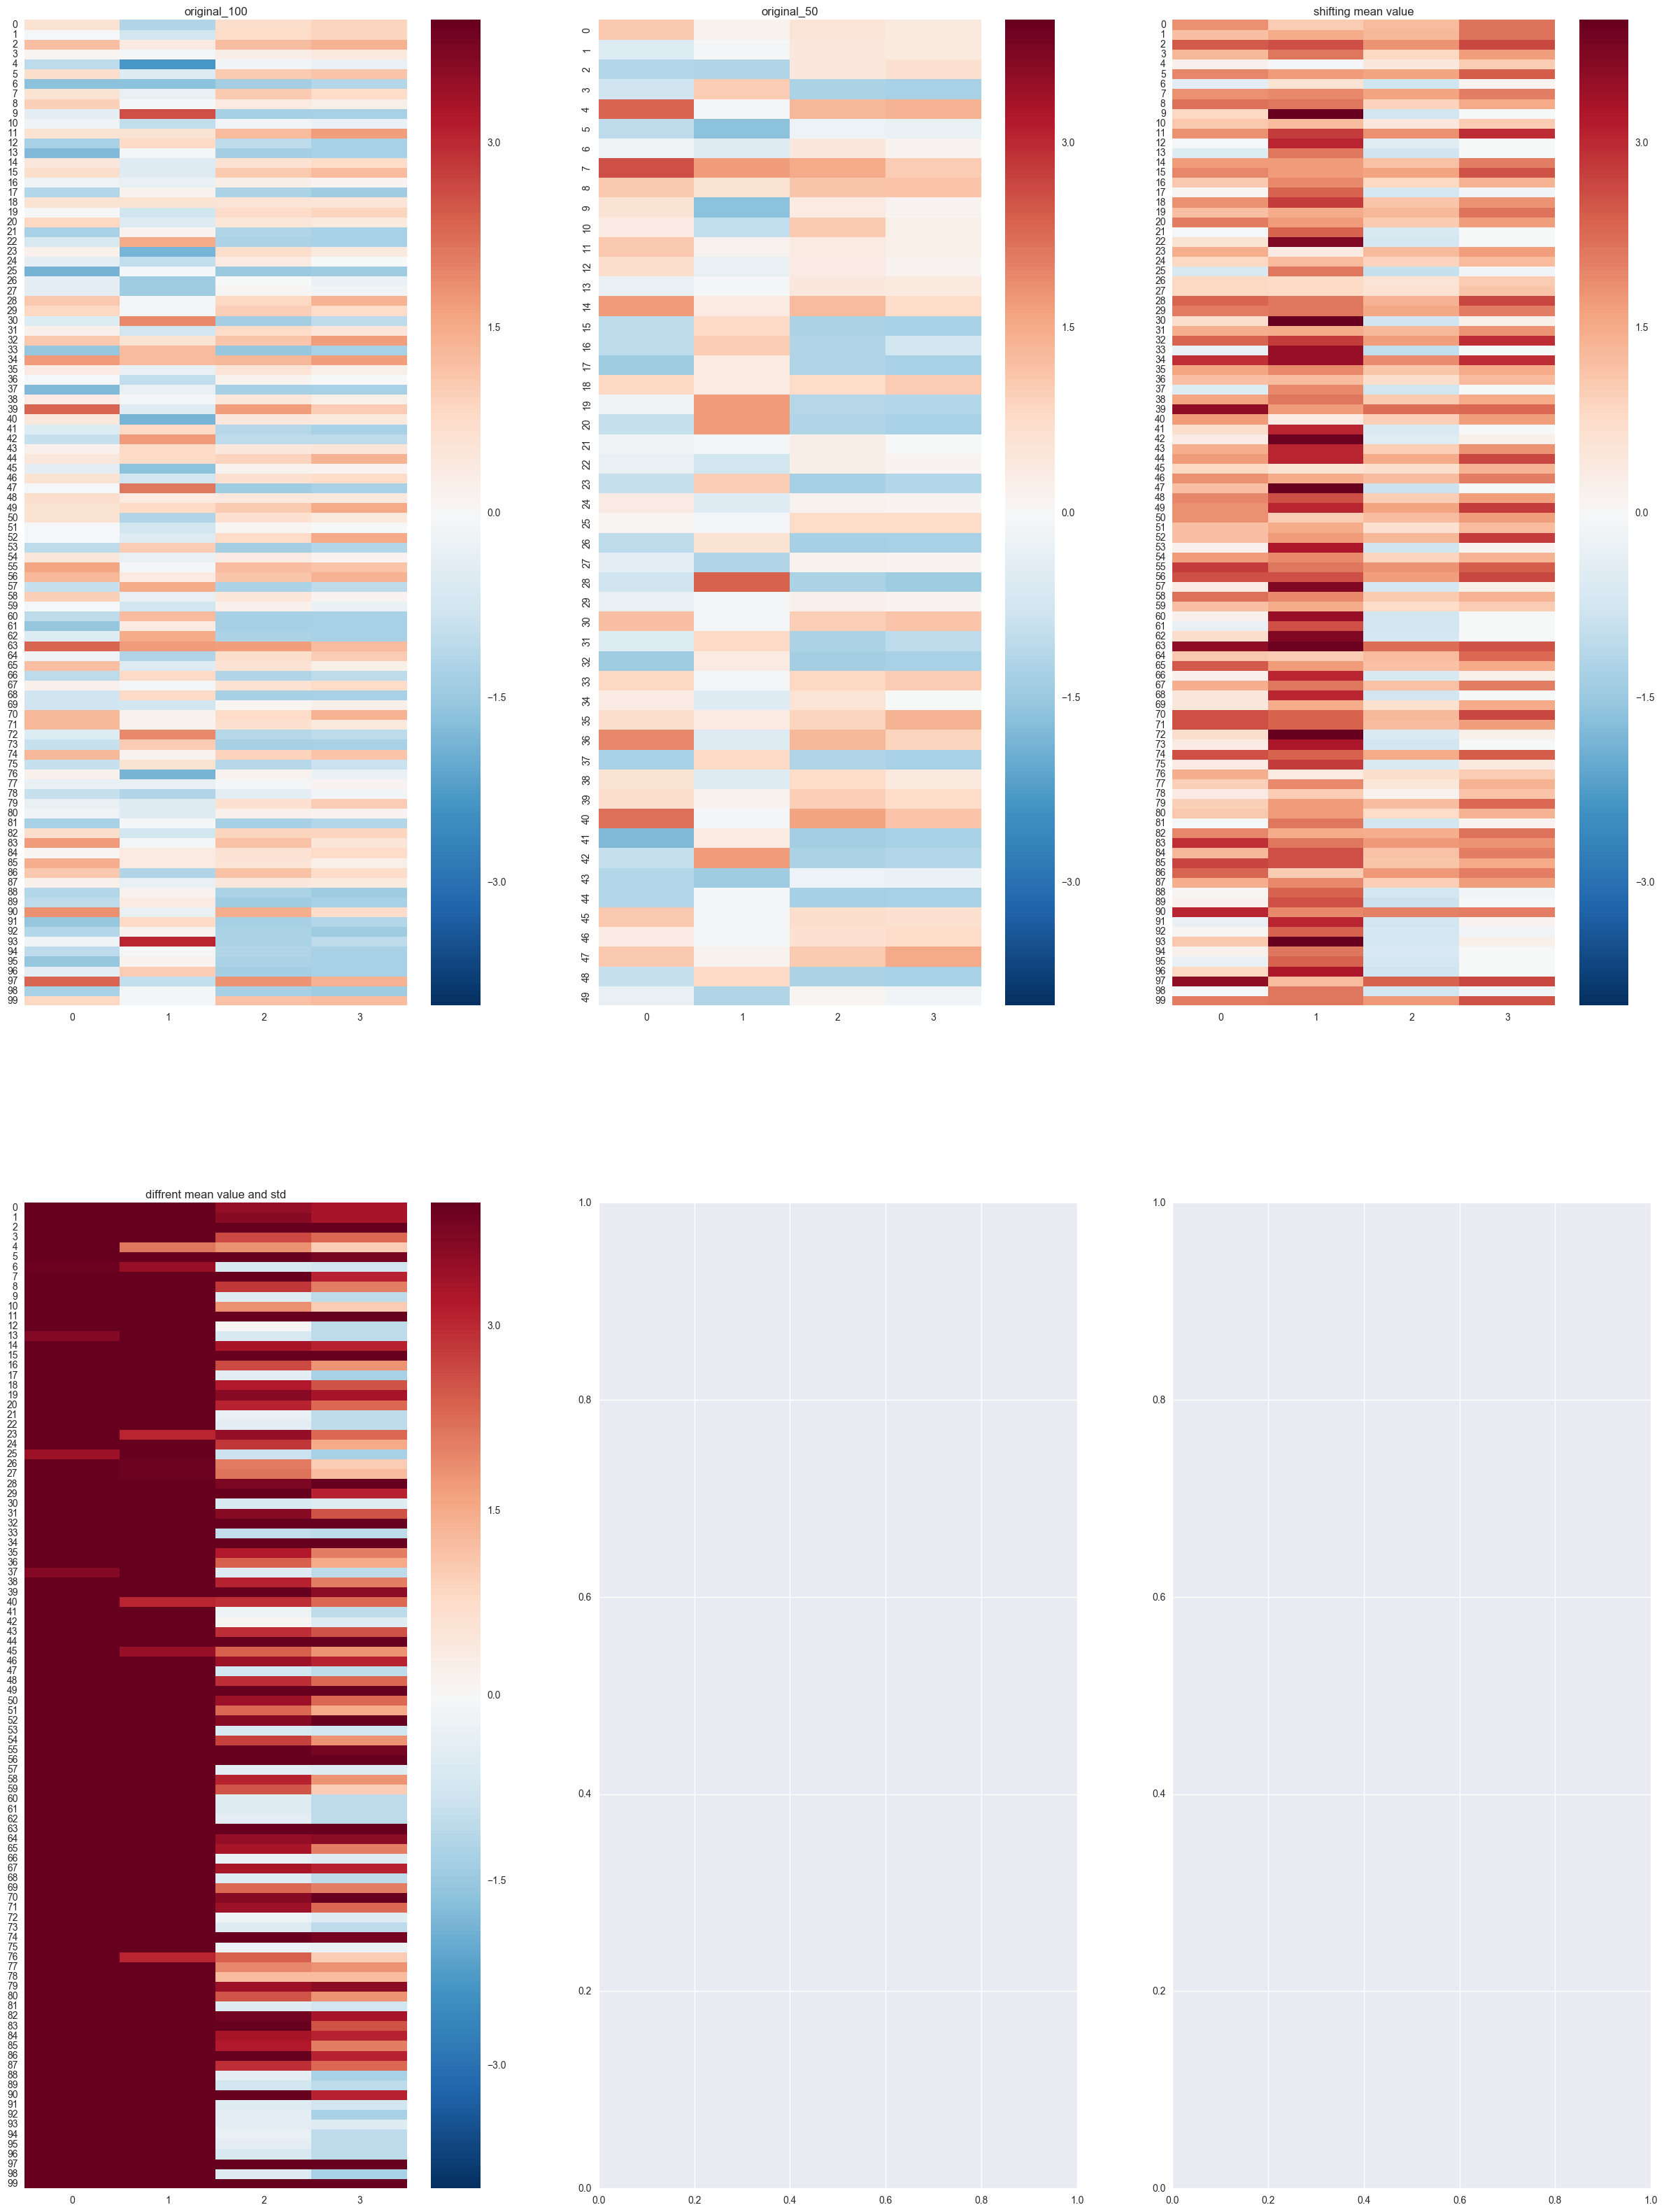

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#set plot configuration
f, axarr = plt.subplots(2,3,figsize=(30, 40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#normalize part1 data
standardized_data_1 = (data_1-data_1.mean(axis=0))/data_1.std(axis=0)
#normalize part2 with same mean and standard deviation as part1
data_copy = data_2
standardized_data_2 = (data_copy-data_1.mean(axis=0))/data_1.std(axis=0)

#generate same standard deviation data as part1 with different mean value
data_copy2 = data_1+1
standardized_data_3 = (data_copy2-data_1.mean(axis=0))/data_1.std(axis=0)

#generate data with different standard deviation and mean value from part1
data_copy3 = data_1*2
standardized_data_4 = (data_copy3-data_1.mean(axis=0))/data_1.std(axis=0)


#generate different standard deviation and mean value data from part1 
data_copy6 = data_1
data_copy6 = np.random.normal(data_1.mean(axis=0),data_1.std(axis=0),size=data_1.shape)
standardized_data_7 = (data_copy6-data_1.mean(axis=0))/data_1.std(axis=0)

sns.heatmap(standardized_data_1,ax=axarr[0][0],vmin=-4,vmax=4)
sns.heatmap(standardized_data_2,ax=axarr[0][1],vmin=-4,vmax=4)
sns.heatmap(standardized_data_3,ax=axarr[0][2],vmin=-4,vmax=4)
sns.heatmap(standardized_data_4,ax=axarr[1][0],vmin=-4,vmax=4)
axarr[0][0].set_title("original_100")
axarr[0][1].set_title("original_50")
axarr[0][2].set_title("shifting mean value")
axarr[1][0].set_title("diffrent mean value and std")

plt.show()


The heat map image has four columns corresponding to 4 features repectively and each row represents one data point. Deeper color represents the feature value is far from average value. The upper left heat map represents part1 data distribution and upper middle represents part2 data distribution. Most color values in part1 and part2 heat map are similar because both data are from the same source. In the opposite case, there are many deep color in the upper right heat map because the map is consisted of completely different distribution data from part1. In this map I shift the part1 data one unit, so most feature values are far from average value of part1. Most values in the lower left heat map are also far from part1.


Through the heat map visualization tool, we can easily distinguish different data distribution. If the trained model always has awful accuracy on the testing data, you should check out whether the testing data and training data are from the same source.

# Apply classifier to different data distribution

In [4]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
model = rf.fit(standardized_data_1,true_1)
y_predprob_test = model.predict_proba(standardized_data_1)
y_pred_test = np.argmax(y_predprob_test,axis=1)
acc1 = metrics.accuracy_score(true_1, y_pred_test)
print("Test1 on training data set, accuracy:",acc1)

y_predprob_test = model.predict_proba(standardized_data_2)
y_pred_test = np.argmax(y_predprob_test,axis=1)
acc2 = metrics.accuracy_score(true_2, y_pred_test)
print("Test2 on part2 data, accuracy:",acc2)

y_predprob_test = model.predict_proba(standardized_data_3)
y_pred_test = np.argmax(y_predprob_test,axis=1)
acc3 = metrics.accuracy_score(true_1, y_pred_test)
print("Test3 on shifting mean value data, accuracy:",acc3)

y_predprob_test = model.predict_proba(standardized_data_4)
y_pred_test = np.argmax(y_predprob_test,axis=1)
acc4 = metrics.accuracy_score(true_1, y_pred_test)
print("Test4 on diffrent mean and std value data, accuracy:",acc4)


Test1 on training data set, accuracy: 1.0
Test2 on part2 data, accuracy: 0.94
Test3 on shifting mean value data, accuracy: 0.53
Test4 on diffrent mean and std value data, accuracy: 0.41


Random forest is known as famously emsemble classifier. Here, we use random forest to train the model on part1 data and make predictions on different dataset. There are four different dataset described in the above introduction for testing. Test1 uses training data for testing and the accuracy is, no doubt, very good. Test2 use part2 data for testing and is also very well because part1 and part2 are collected from the same source and have similar data distribution. Test3 and Test4 use different data distribution dataset for testing and get very poor accuracy because the model haven't saw both data distribution.

Visualization tool is important for each mining processes. Using them appropriately can save much time and get clear direction to research on. Finally, there're also many formal statistical methods which can distinguish data such like KL divergence. Try more different methods and pick up one you like.